<a href="https://colab.research.google.com/github/ashutova/5/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Произведение импорта библиотек, необходимых для дальнейшего анализа интересующего нас датасета
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
# Pагрузка нашего датасета (в формате csv), содержащего информацию об исследуемых параметрах, которые могли оказать влияние на выживаемость саженцев разных видов
from google.colab import drive
drive.mount('/content/gdrive')

df1 = pd.read_csv('/content/gdrive/MyDrive/Dataset/Tree.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Начало обработки датасета перед проведением анализа
df1.head()

,No,Plot,Subplot,Species,Light_ISF,Core,Soil_type,Myco,SoilMyco,PlantDate,Phenolics,Lignin,NSC,Alive,Soil,Light_Cat
0,126,1,C,Acer saccharum,0.106,2017,Heterospecific,AMF,AMF,6/11/18,-0.56,13.86,12.15,False,Prunus serotina,Med
1,11,1,C,Quercus alba,0.106,2017,Heterospecific,EMF,EMF,5/25/18,5.19,20.52,19.29,True,Quercus rubra,Med
2,12,1,C,Quercus rubra,0.106,2017,Heterospecific,EMF,AMF,5/31/18,3.36,24.74,15.01,False,Prunus serotina,Med
3,2823,7,D,Acer saccharum,0.080,2016,Heterospecific,AMF,AMF,6/11/18,-0.71,14.29,12.36,False,Prunus serotina,Med
4,5679,14,A,Acer saccharum,0.060,2017,Heterospecific,AMF,AMF,6/11/18,-0.58,10.85,11.20,False,Prunus serotina,Low


In [ ]:

df1.columns

Index(['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Core', 'Soil_type',
       'Myco', 'SoilMyco', 'PlantDate', 'Phenolics', 'Lignin', 'NSC', 'Alive',
       'Soil', 'Light_Cat'],
      dtype='object')

In [ ]:
#Удаление из датасета столбцов, содержащих избыточную информацию, а также столбцов с теми переменными, влияние которых на выживаемость сеянцев точно будет незначительным
df = df1.copy()
df.drop(columns =['Subplot', 'No', 'Plot', 'Core', 'SoilMyco', 'PlantDate', 'Light_Cat', 'Soil'], inplace = True)


In [ ]:
#Проверка типа данных переменных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    2783 non-null   object 
 1   Light_ISF  2783 non-null   float64
 2   Soil_type  2783 non-null   object 
 3   Myco       2783 non-null   object 
 4   Phenolics  2783 non-null   float64
 5   Lignin     2783 non-null   float64
 6   NSC        2783 non-null   float64
 7   Alive      2783 non-null   bool   
dtypes: bool(1), float64(4), object(3)
memory usage: 155.0+ KB


In [ ]:
#Проверка наличия пропущенных значений в датасете
df.isnull().sum()

Species      0
Light_ISF    0
Soil_type    0
Myco         0
Phenolics    0
Lignin       0
NSC          0
Alive        0
dtype: int64

In [ ]:
#Оценка датасета после предварительной обработки
df

,Species,Light_ISF,Soil_type,Myco,Phenolics,Lignin,NSC,Alive
0,Acer saccharum,0.106,Heterospecific,AMF,-0.56,13.86,12.15,False
1,Quercus alba,0.106,Heterospecific,EMF,5.19,20.52,19.29,True
2,Quercus rubra,0.106,Heterospecific,EMF,3.36,24.74,15.01,False
3,Acer saccharum,0.080,Heterospecific,AMF,-0.71,14.29,12.36,False
4,Acer saccharum,0.060,Heterospecific,AMF,-0.58,10.85,11.20,False
...,...,...,...,...,...,...,...,...
2778,Prunus serotina,0.111,Heterospecific,AMF,0.83,9.15,11.88,False
2779,Quercus alba,0.118,Heterospecific,EMF,4.88,19.01,23.50,False
2780,Quercus alba,0.118,Heterospecific,EMF,5.51,21.13,19.10,False
2781,Quercus alba,0.161,Sterilized,EMF,4.28,19.38,21.36,False


In [ ]:
#Удаление строк с отрицательными значениями переменной 'Phenolics', так как в описании к датасету на Kaggle было указано, что содержание данных соединений измерялось в нмолях.
#Содержание веществ в растительной ткани не может быть отрицатльным (возможно, проблема заключалась в низкой чувствительности метода исследования данного параметра).
#Строки с отрицательными значениями содержания фенольных соединений мы удаляем
df = df[df['Phenolics'] >= 0]
df

,Species,Light_ISF,Soil_type,Myco,Phenolics,Lignin,NSC,Alive
1,Quercus alba,0.106,Heterospecific,EMF,5.19,20.52,19.29,True
2,Quercus rubra,0.106,Heterospecific,EMF,3.36,24.74,15.01,False
5,Prunus serotina,0.106,Heterospecific,AMF,0.30,10.80,13.79,False
6,Quercus alba,0.108,Heterospecific,EMF,5.11,18.82,22.51,False
7,Quercus rubra,0.108,Sterilized,EMF,3.43,25.22,14.81,False
...,...,...,...,...,...,...,...,...
2778,Prunus serotina,0.111,Heterospecific,AMF,0.83,9.15,11.88,False
2779,Quercus alba,0.118,Heterospecific,EMF,4.88,19.01,23.50,False
2780,Quercus alba,0.118,Heterospecific,EMF,5.51,21.13,19.10,False
2781,Quercus alba,0.161,Sterilized,EMF,4.28,19.38,21.36,False


In [ ]:
#Преобразование категориальных переменных
df.Species.replace('Quercus alba', 0, inplace = True)
df.Species.replace('Quercus rubra', 1, inplace = True)
df.Species.replace('Prunus serotina', 2, inplace = True)
df.Species.replace('Acer saccharum', 3, inplace = True)

df = pd.get_dummies(df, columns=['Myco'])
df = pd.get_dummies(df, columns=['Soil_type'])
df['Alive'] = df['Alive'].astype(int)

print(df)



      Species  Light_ISF  Phenolics  Lignin    NSC  Alive  Myco_AMF  Myco_EMF  \
1           0      0.106       5.19   20.52  19.29      1     False      True   
2           1      0.106       3.36   24.74  15.01      0     False      True   
5           2      0.106       0.30   10.80  13.79      0      True     False   
6           0      0.108       5.11   18.82  22.51      0     False      True   
7           1      0.108       3.43   25.22  14.81      0     False      True   
...       ...        ...        ...     ...    ...    ...       ...       ...   
2778        2      0.111       0.83    9.15  11.88      0      True     False   
2779        0      0.118       4.88   19.01  23.50      0     False      True   
2780        0      0.118       5.51   21.13  19.10      0     False      True   
2781        0      0.161       4.28   19.38  21.36      0     False      True   
2782        2      0.141       1.00    9.04  11.82      0      True     False   

      Soil_type_Conspecific

<ipython-input-71-d39bb5394105>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Species.replace('Quercus alba', 0, inplace = True)
<ipython-input-71-d39bb5394105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Species.replace('Quercus rubra', 1, inplace = True)
<ipython-input-71-d39bb5394105>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Species.replace('Prunus serotina', 2, inplace = True)
<ipython-input-71-d39bb5394105

In [ ]:
df['Myco_AMF'] = df['Myco_AMF'].astype(int)
df['Myco_EMF'] = df['Myco_EMF'].astype(int)
df['Soil_type_Conspecific'] = df['Soil_type_Conspecific'].astype(int)
df['Soil_type_Heterospecific'] = df['Soil_type_Heterospecific'].astype(int)
df['Soil_type_Sterilized'] = df['Soil_type_Sterilized'].astype(int)
df

,Species,Light_ISF,Phenolics,Lignin,NSC,Alive,Myco_AMF,Myco_EMF,Soil_type_Conspecific,Soil_type_Heterospecific,Soil_type_Sterilized
1,0,0.106,5.19,20.52,19.29,1,0,1,0,1,0
2,1,0.106,3.36,24.74,15.01,0,0,1,0,1,0
5,2,0.106,0.30,10.80,13.79,0,1,0,0,1,0
6,0,0.108,5.11,18.82,22.51,0,0,1,0,1,0
7,1,0.108,3.43,25.22,14.81,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2778,2,0.111,0.83,9.15,11.88,0,1,0,0,1,0
2779,0,0.118,4.88,19.01,23.50,0,0,1,0,1,0
2780,0,0.118,5.51,21.13,19.10,0,0,1,0,1,0
2781,0,0.161,4.28,19.38,21.36,0,0,1,0,0,1


In [ ]:
#Функция для построения корреляционной матрицы
def draw_corr_matrix(df: pd.DataFrame, shape: int): #
    df = df.corr().copy()
    plt.rcParams["figure.figsize"] = shape,shape
    plt.imshow(df, cmap ='viridis')


    plt.colorbar()

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            text = plt.text(j, i, round(float(df.iloc[i, j]),2),
                        ha="center", va="center", color="r")

    plt.xticks(range(len(df)), df.columns, rotation = 45)


    plt.yticks(range(len(df)), df.index)

    plt.show()

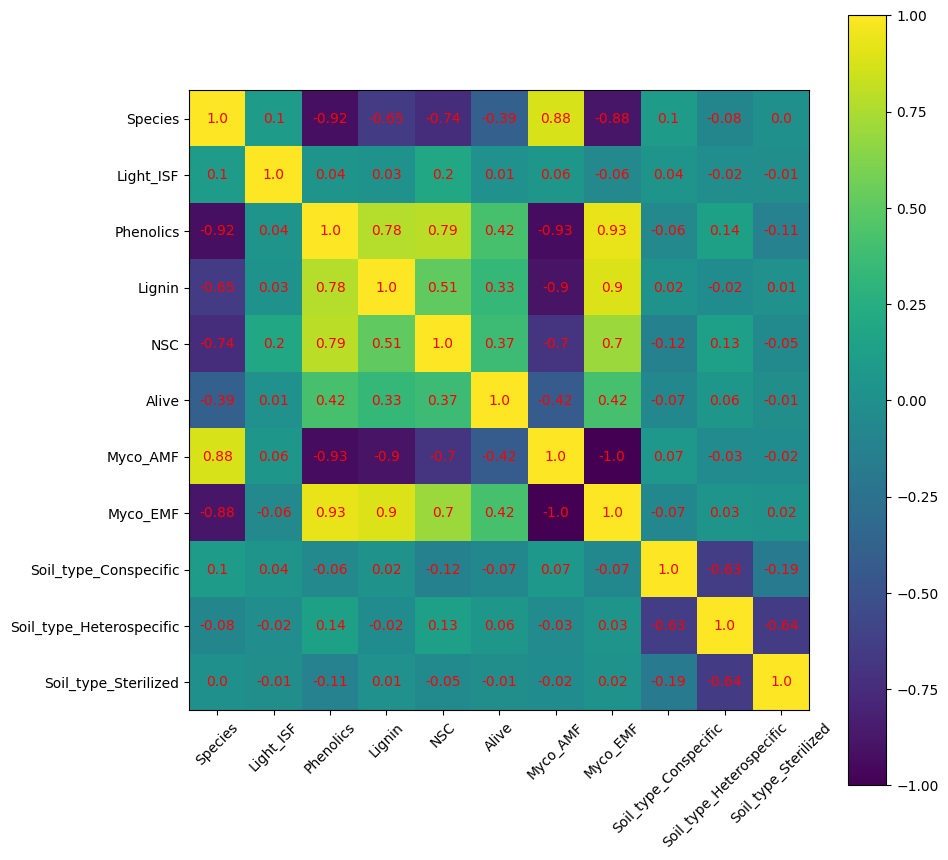

In [ ]:
#Построение корреляционной матрицы
draw_corr_matrix(df, 10)

In [ ]:
#Удаление из датасета столбцов, показывающих наименьшую корреляцию с исследуемой нами переменной ('Alive')
df.drop(columns=[	'Light_ISF', 'Soil_type_Heterospecific', 'Soil_type_Sterilized' ], inplace=True)

In [ ]:
#Обучение модели предсказывать выживаемость саженцев в зависимости от значений следующих параметров: вид сеянца, содержание в растительной ткани фенольных соединений, лигнина и неструктурных углеводов,
#наличия экто- или арбускулярной микоризы, наличие/отсутствие конспецифичной почвы
x = df.drop(columns=['Alive'])
y = df['Alive']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=20)
len(x_test)
len(x_train)
len(y_train)
len(y_test)

228

In [ ]:
#Проверка точности работы обученной модели, предсказывающей выживаемость саженцев на основе выбранных нами в ходе анализа датасета переменных


In [ ]:
# 1 способ - Решающее дерево (Точность - 83,3%)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=10)
dt.fit(x_train,y_train)
y_test_predictions_dt=dt.predict(x_test)
metrics.accuracy_score(y_test, y_test_predictions_dt)*100

83.33333333333334

Accuracy: 0.8026315789473685
Mean Squared Error: 0.19736842105263158


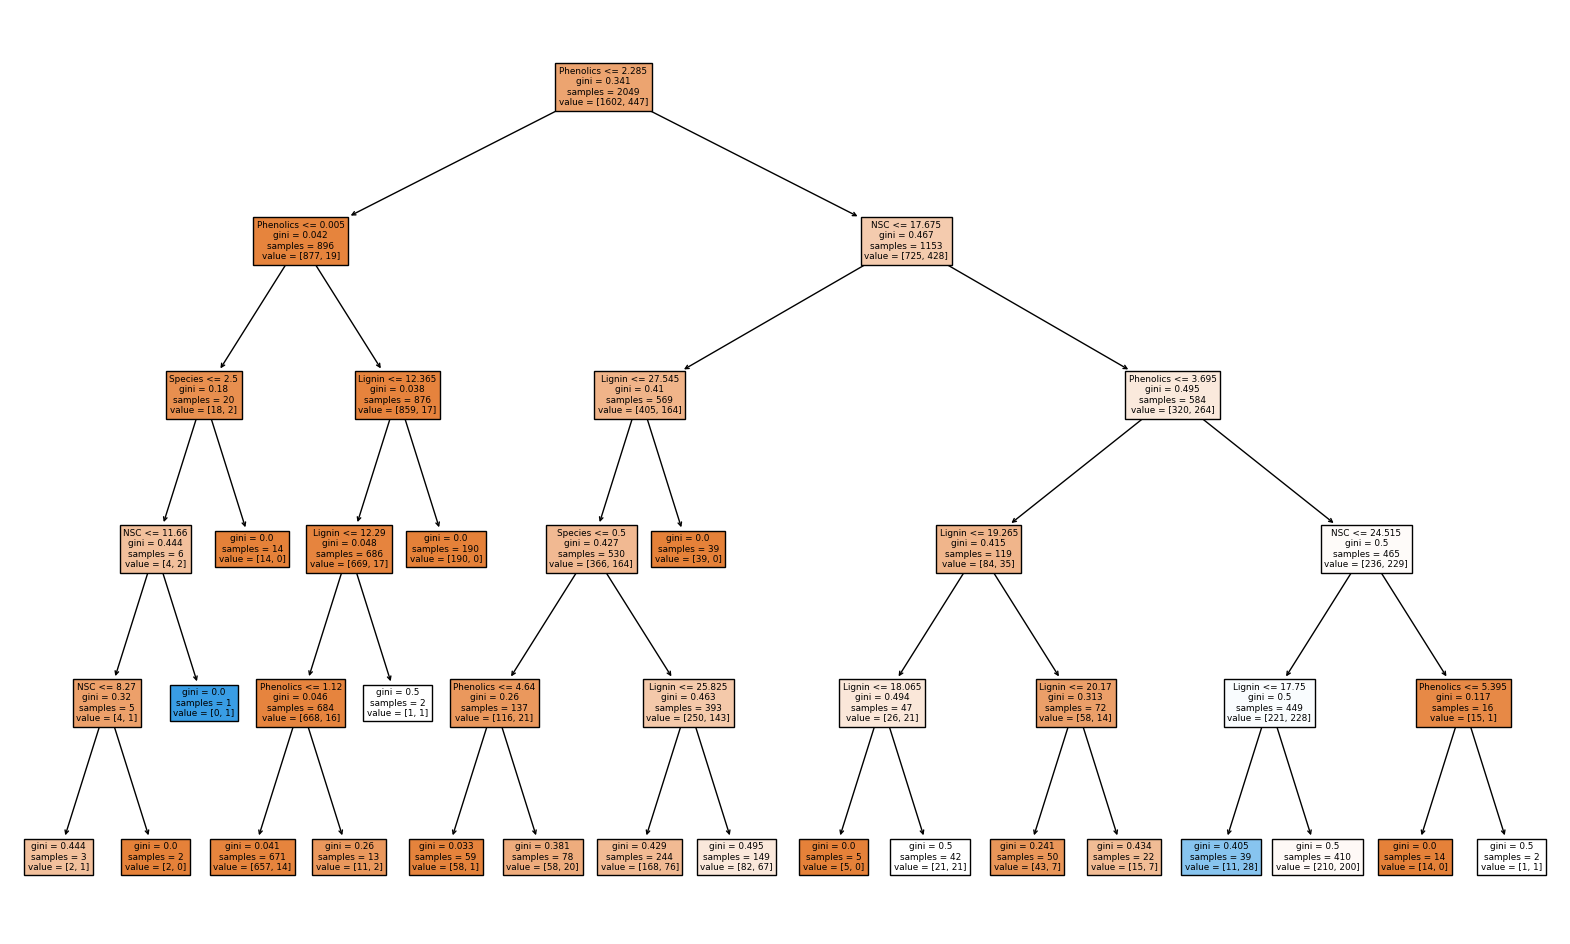

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

tree= DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=4, splitter="best")
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

features = ['Species',	'Phenolics',	'Lignin',	'NSC',	'Alive',	'Myco_AMF',	'Myco_EMF',	'Soil_type_Conspecific']

feature_names = df[features].columns.tolist()


plt.figure(figsize=(20, 12))
plot_tree(tree, feature_names=feature_names,filled=True)
plt.show()


In [ ]:
# 2 способ - Логистическая регрессия (Точность - 79,8%)
from sklearn.linear_model import LinearRegression
lr = LogisticRegression(random_state=10)
lr.fit(x_train, y_train)
y_test_predictions_lr=lr.predict(x_test)
y_test_predictions_lr
metrics.accuracy_score(y_test, y_test_predictions_lr)*100

79.82456140350878

In [ ]:
# 3 способ - Рандомный лес (Точность - 83,7%)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")


Точность модели: 0.8377192982456141


In [ ]:
#Проверка работы обученной модели путём проверки точности предсказывания выживаемости саженцев на основе нового датасета
test_data = pd.read_csv('/content/gdrive/MyDrive/Dataset/ppp.csv')
test_data.head()


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Soil_type,Myco,SoilMyco,PlantDate,Phenolics,Lignin,NSC,Alive
0,2805,7,C,Quercus alba,0.082,Med,2016,Quercus rubra,Heterospecific,EMF,EMF,5/25/18,5.01,19.39,20.67,False
1,5375,13,E,Quercus rubra,0.077,Med,2017,Quercus rubra,Conspecific,EMF,EMF,5/24/18,3.60,25.50,14.73,False
2,5400,13,C,Quercus alba,0.087,Med,2017,Quercus rubra,Heterospecific,EMF,EMF,5/25/18,5.36,19.64,20.87,False
3,5403,13,B,Quercus alba,0.093,Med,2016,Populus grandidentata,Heterospecific,EMF,EMF,5/29/18,5.07,24.06,16.25,False
4,5416,13,D,Prunus serotina,0.086,Med,2017,Quercus rubra,Heterospecific,AMF,EMF,6/7/18,1.07,8.43,11.67,False


In [ ]:
test_data.columns

Index(['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core',
       'Soil', 'Soil_type', 'Myco', 'SoilMyco', 'PlantDate', 'Phenolics',
       'Lignin', 'NSC', 'Alive'],
      dtype='object')

In [ ]:
test_data.drop(columns =['Subplot', 'No', 'Plot', 'Core', 'SoilMyco', 'PlantDate', 'Light_Cat', 'Soil', 'Light_ISF'], inplace = True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    501 non-null    object 
 1   Soil_type  501 non-null    object 
 2   Myco       501 non-null    object 
 3   Phenolics  501 non-null    float64
 4   Lignin     501 non-null    float64
 5   NSC        501 non-null    float64
 6   Alive      501 non-null    bool   
dtypes: bool(1), float64(3), object(3)
memory usage: 24.1+ KB


In [ ]:
test_data

,Species,Soil_type,Myco,Phenolics,Lignin,NSC,Alive
0,Quercus alba,Heterospecific,EMF,5.01,19.39,20.67,False
1,Quercus rubra,Conspecific,EMF,3.60,25.50,14.73,False
2,Quercus alba,Heterospecific,EMF,5.36,19.64,20.87,False
3,Quercus alba,Heterospecific,EMF,5.07,24.06,16.25,False
4,Prunus serotina,Heterospecific,AMF,1.07,8.43,11.67,False
...,...,...,...,...,...,...,...
496,Quercus alba,Heterospecific,EMF,4.74,23.67,16.12,True
497,Quercus alba,Sterilized,EMF,2.46,19.50,18.63,False
498,Prunus serotina,Heterospecific,AMF,1.20,10.75,14.03,False
499,Quercus rubra,Sterilized,EMF,3.02,24.76,13.06,False


In [ ]:
test_data = test_data[test_data['Phenolics'] >= 0]
test_data

,Species,Soil_type,Myco,Phenolics,Lignin,NSC,Alive
0,Quercus alba,Heterospecific,EMF,5.01,19.39,20.67,False
1,Quercus rubra,Conspecific,EMF,3.60,25.50,14.73,False
2,Quercus alba,Heterospecific,EMF,5.36,19.64,20.87,False
3,Quercus alba,Heterospecific,EMF,5.07,24.06,16.25,False
4,Prunus serotina,Heterospecific,AMF,1.07,8.43,11.67,False
...,...,...,...,...,...,...,...
496,Quercus alba,Heterospecific,EMF,4.74,23.67,16.12,True
497,Quercus alba,Sterilized,EMF,2.46,19.50,18.63,False
498,Prunus serotina,Heterospecific,AMF,1.20,10.75,14.03,False
499,Quercus rubra,Sterilized,EMF,3.02,24.76,13.06,False


In [ ]:
test_data.Species.replace('Quercus alba', 0, inplace = True)
test_data.Species.replace('Quercus rubra', 1, inplace = True)
test_data.Species.replace('Prunus serotina', 2, inplace = True)
test_data.Species.replace('Acer saccharum', 3, inplace = True)

test_data = pd.get_dummies(test_data, columns=['Myco'])
test_data = pd.get_dummies(test_data, columns=['Soil_type'])
test_data['Alive'] = test_data['Alive'].astype(int)

print(test_data)

test_data['Myco_AMF'] = test_data['Myco_AMF'].astype(int)
test_data['Myco_EMF'] = test_data['Myco_EMF'].astype(int)
test_data['Soil_type_Conspecific'] = test_data['Soil_type_Conspecific'].astype(int)
test_data['Soil_type_Sterilized'] = test_data['Soil_type_Sterilized'].astype(int)
test_data['Soil_type_Heterospecific'] = test_data['Soil_type_Heterospecific'].astype(int)
test_data


     Species  Phenolics  Lignin    NSC  Alive  Myco_AMF  Myco_EMF  \
0          0       5.01   19.39  20.67      0     False      True   
1          1       3.60   25.50  14.73      0     False      True   
2          0       5.36   19.64  20.87      0     False      True   
3          0       5.07   24.06  16.25      0     False      True   
4          2       1.07    8.43  11.67      0      True     False   
..       ...        ...     ...    ...    ...       ...       ...   
496        0       4.74   23.67  16.12      1     False      True   
497        0       2.46   19.50  18.63      0     False      True   
498        2       1.20   10.75  14.03      0      True     False   
499        1       3.02   24.76  13.06      0     False      True   
500        2       0.61    7.37  11.29      0      True     False   

     Soil_type_Conspecific  Soil_type_Heterospecific  Soil_type_Sterilized  
0                    False                      True                 False  
1                

<ipython-input-87-84564cb4704b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.Species.replace('Quercus alba', 0, inplace = True)
<ipython-input-87-84564cb4704b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.Species.replace('Quercus rubra', 1, inplace = True)
<ipython-input-87-84564cb4704b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.Species.replace('Prunus serotina', 2, inplace = True)
<ipython-

,Species,Phenolics,Lignin,NSC,Alive,Myco_AMF,Myco_EMF,Soil_type_Conspecific,Soil_type_Heterospecific,Soil_type_Sterilized
0,0,5.01,19.39,20.67,0,0,1,0,1,0
1,1,3.60,25.50,14.73,0,0,1,1,0,0
2,0,5.36,19.64,20.87,0,0,1,0,1,0
3,0,5.07,24.06,16.25,0,0,1,0,1,0
4,2,1.07,8.43,11.67,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
496,0,4.74,23.67,16.12,1,0,1,0,1,0
497,0,2.46,19.50,18.63,0,0,1,0,0,1
498,2,1.20,10.75,14.03,0,1,0,0,1,0
499,1,3.02,24.76,13.06,0,0,1,0,0,1


In [ ]:
test_data.drop(columns =['Soil_type_Heterospecific', 'Soil_type_Sterilized'], inplace = True)

In [ ]:
predicted_values = lr.predict(test_data[['Species',	'Phenolics',	'Lignin',	'NSC',	'Myco_AMF',	'Myco_EMF',	'Soil_type_Conspecific']])
test_data['Predicted_Alive'] = predicted_values
print(test_data[['Species',		'Phenolics',	'Lignin',	'NSC',	'Myco_AMF',	'Myco_EMF',	'Soil_type_Conspecific']])
true_values = test_data['Alive']

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_values, predicted_values)
print(f"Точность модели на новом датасете: {accuracy}")

predicted_values = lr.predict(test_data[['Species',	'Phenolics',	'Lignin',	'NSC',	'Myco_AMF',	'Myco_EMF',	'Soil_type_Conspecific']])
true_values = test_data['Alive']


     Species  Phenolics  Lignin    NSC  Myco_AMF  Myco_EMF  \
0          0       5.01   19.39  20.67         0         1   
1          1       3.60   25.50  14.73         0         1   
2          0       5.36   19.64  20.87         0         1   
3          0       5.07   24.06  16.25         0         1   
4          2       1.07    8.43  11.67         1         0   
..       ...        ...     ...    ...       ...       ...   
496        0       4.74   23.67  16.12         0         1   
497        0       2.46   19.50  18.63         0         1   
498        2       1.20   10.75  14.03         1         0   
499        1       3.02   24.76  13.06         0         1   
500        2       0.61    7.37  11.29         1         0   

     Soil_type_Conspecific  
0                        0  
1                        1  
2                        0  
3                        0  
4                        0  
..                     ...  
496                      0  
497                    

In [ ]:
#Точность определения обученной модели на новом датасете составила 78,7%

In [ ]:
#Далее визуализировали некоторые наиболее значимые для работы модели параметры

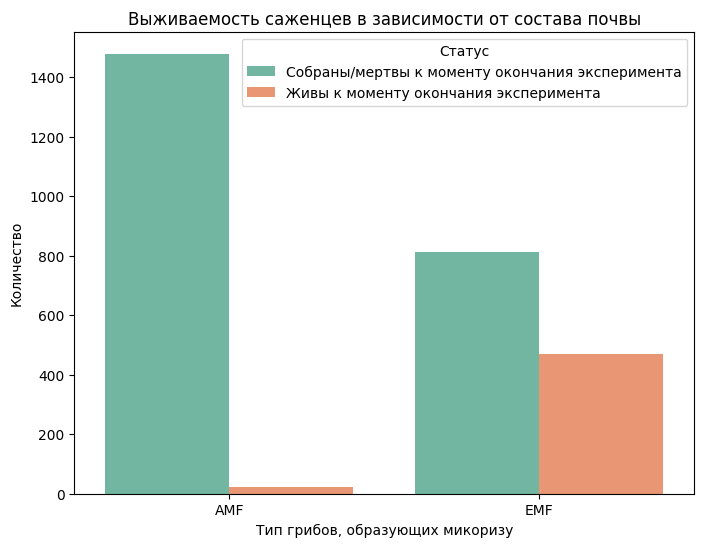

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Myco', hue='Alive', data=df1, palette='Set2')
plt.title('Выживаемость саженцев в зависимости от состава почвы')
plt.xlabel('Тип грибов, образующих микоризу')
plt.ylabel('Количество')
plt.legend(title='Статус', labels=[ 'Собраны/мертвы к моменту окончания эксперимента', "Живы к моменту окончания эксперимента"])
plt.show()

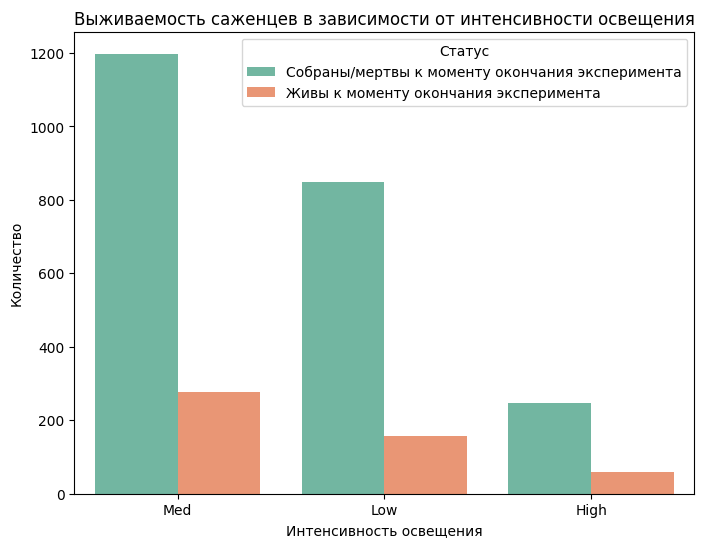

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='Light_Cat', hue='Alive', data=df, palette='Set2')
plt.title('Выживаемость саженцев в зависимости от интенсивности освещения')
plt.xlabel('Интенсивность освещения')
plt.ylabel('Количество')
plt.legend(title='Статус', labels=[ 'Собраны/мертвы к моменту окончания эксперимента', "Живы к моменту окончания эксперимента"])
plt.show()

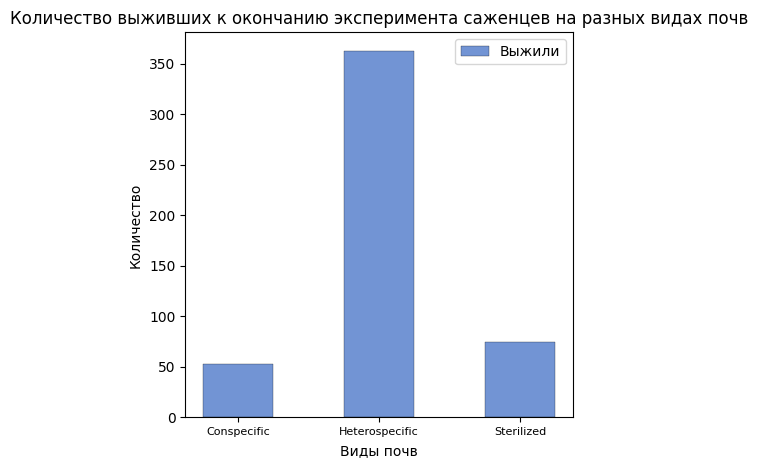

In [ ]:

grouped_df = df1.groupby('Soil_type').sum()

fig = plt.figure(figsize=(5,5))
plt.bar(grouped_df.index, grouped_df['Alive'], label='Выжили', width=0.5, edgecolor='k', linewidth=0.2,color='#7294d4')

plt.xlabel('Виды почв',labelpad=5,size=10)
plt.ylabel('Количество',labelpad=5,size=10)
plt.title('Количество выживших к окончанию эксперимента саженцев на разных видах почв')
plt.legend()
plt.xticks(size=8)
plt.show()

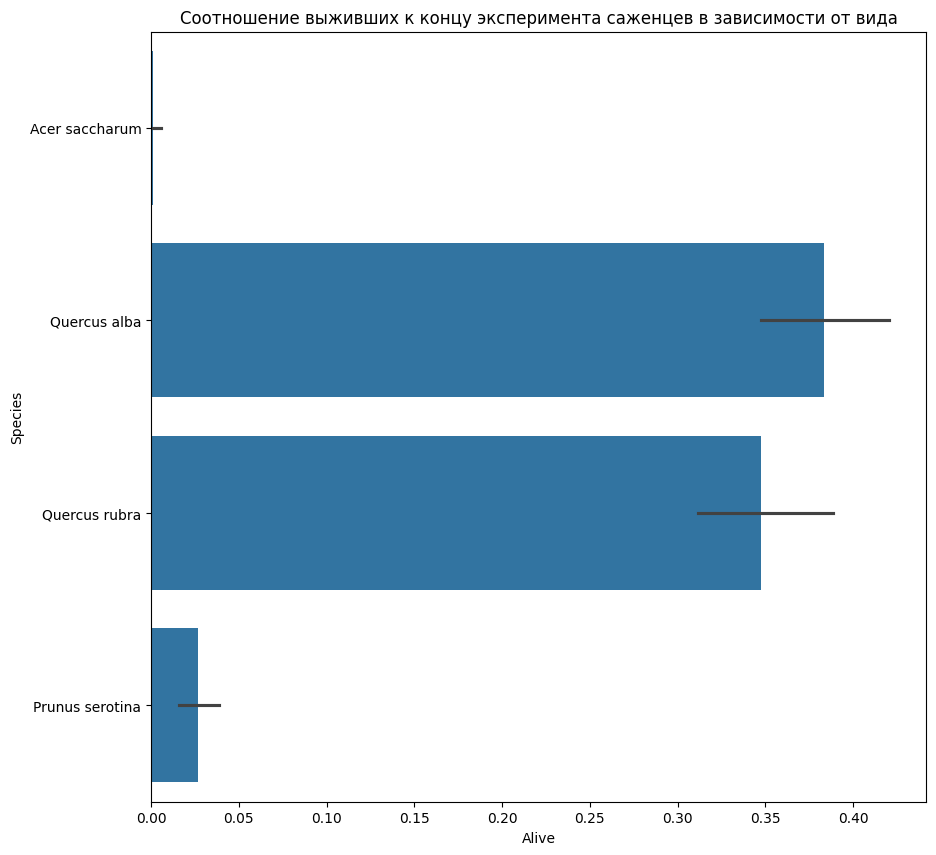

In [ ]:
import pandas as pd
import seaborn as sns
plt.title('Соотношение выживших к концу эксперимента саженцев в зависимости от вида')
sns.barplot(x = 'Alive', y = 'Species', data = df1);

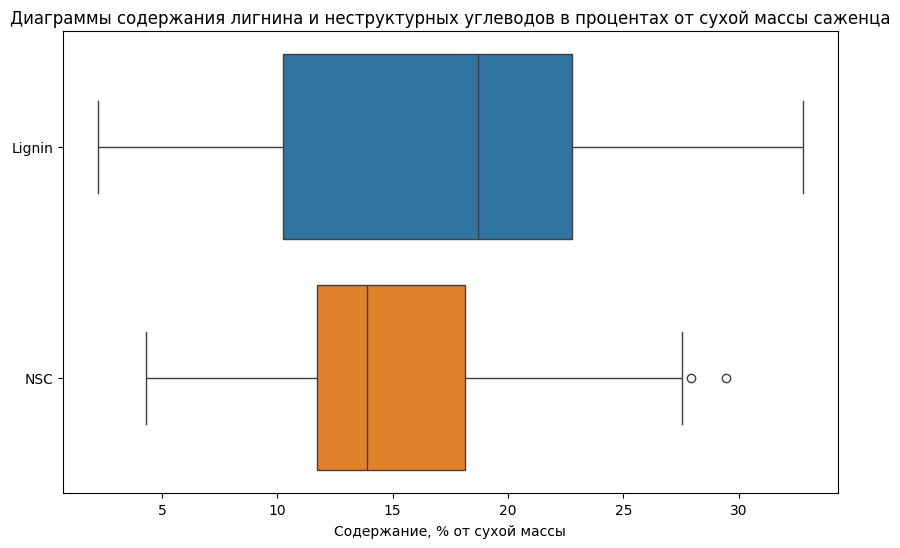

In [ ]:
import seaborn as sns

data = df[['Lignin', 'NSC']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')
plt.title('Диаграммы содержания лигнина и неструктурных углеводов в процентах от сухой массы саженца')
plt.xlabel('Содержание, % от сухой массы',labelpad=5,size=10)
plt.show()

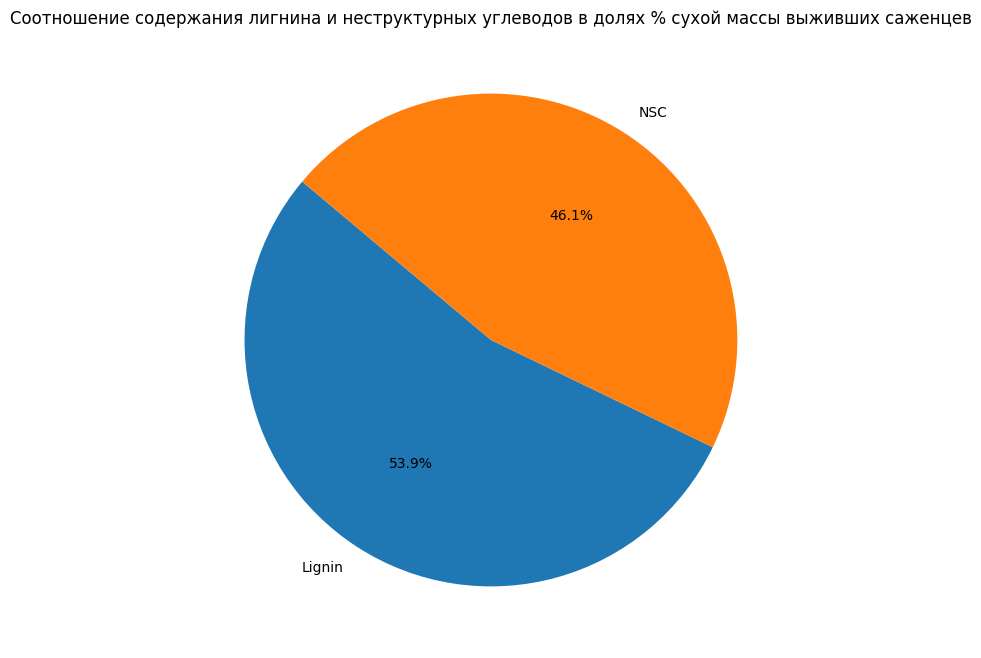

In [ ]:
alive_data = df[df['Alive'] == 1]
mean_values = alive_data[[  'Lignin', 'NSC']].mean()

plt.figure(figsize=(8, 8))
plt.pie(mean_values, labels=mean_values.index, autopct='%1.1f%%', startangle=140)
plt.title("Соотношение содержания лигнина и неструктурных углеводов в долях % сухой массы выживших саженцев")
plt.show()